In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('IPL.csv')
df.head()

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,161,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,149,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22


In [11]:
#Basic Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   match_id             74 non-null     int64 
 1   date                 74 non-null     object
 2   venue                74 non-null     object
 3   team1                74 non-null     object
 4   team2                74 non-null     object
 5   stage                74 non-null     object
 6   toss_winner          74 non-null     object
 7   toss_decision        74 non-null     object
 8   first_ings_score     74 non-null     int64 
 9   first_ings_wkts      74 non-null     int64 
 10  second_ings_score    74 non-null     int64 
 11  second_ings_wkts     74 non-null     int64 
 12  match_winner         74 non-null     object
 13  won_by               74 non-null     object
 14  margin               74 non-null     int64 
 15  player_of_the_match  74 non-null     object
 16  top_scorer

In [14]:
#check the size of rows and columns
print(f"your rows: {df.shape[0]}, your columns: {df.shape[1]}")

your rows: 74, your columns: 20


In [15]:
#How many columns have null value
df.isnull().sum()

match_id               0
date                   0
venue                  0
team1                  0
team2                  0
stage                  0
toss_winner            0
toss_decision          0
first_ings_score       0
first_ings_wkts        0
second_ings_score      0
second_ings_wkts       0
match_winner           0
won_by                 0
margin                 0
player_of_the_match    0
top_scorer             0
highscore              0
best_bowling           0
best_bowling_figure    0
dtype: int64

Text(0, 0.5, 'Teams')

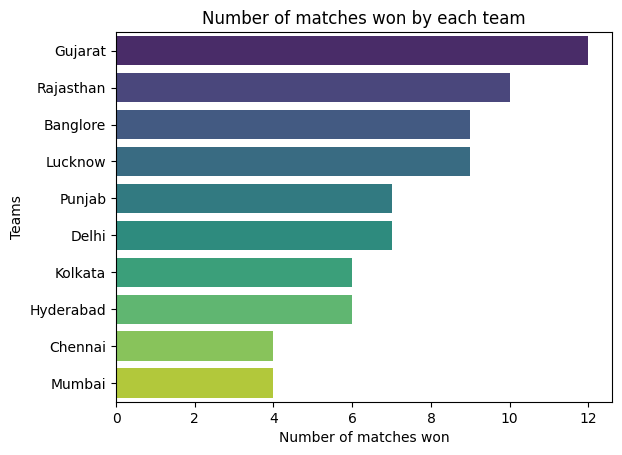

In [ ]:
# 1.which team has won the most number of matches
match_wins = df['match_winner'].value_counts()
match_wins
sns.barplot(y=match_wins.index, x=match_wins.values, palette='viridis')
plt.title('Number of matches won by each team')
plt.xlabel('Number of matches won')
plt.ylabel('Teams')

Text(0, 0.5, 'Count')

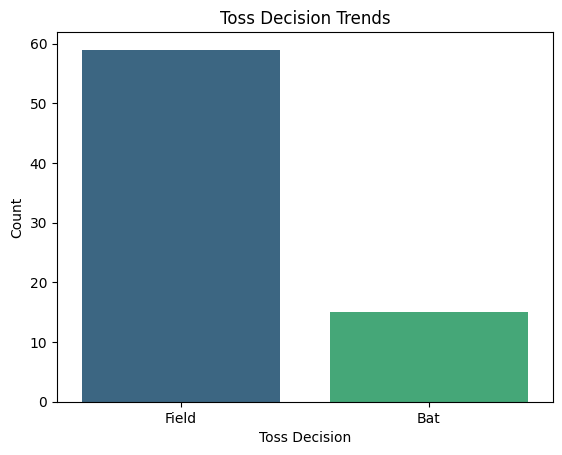

In [26]:
#2. Toss Desicion trends
toss_decision = df['toss_decision'].value_counts()
sns.countplot(x='toss_decision', data=df, palette='viridis')
plt.title('Toss Decision Trends')
plt.xlabel('Toss Decision')
plt.ylabel('Count')

In [30]:
#3. Toss winner match winner
toss_match_winner = df[df['toss_winner'] == df['match_winner']]['match_id'].count()
toss_match_winner_percentage = (toss_match_winner / df['match_id'].nunique()) * 100
print(f"Toss winner also won the match {toss_match_winner_percentage:.2f}% of the time.")

Toss winner also won the match 48.65% of the time.


Text(0.5, 1.0, 'Team Wins by Runs vs Wickets')

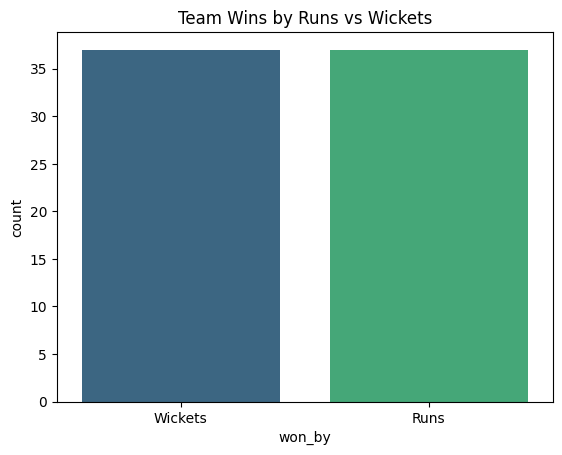

In [32]:
#4. How do team wins runs vs wickets
sns.countplot(x=df['won_by'], palette='viridis')
plt.title('Team Wins by Runs vs Wickets')

Text(0.5, 1.0, 'Top 10 Players with Most Player of the Match Awards')

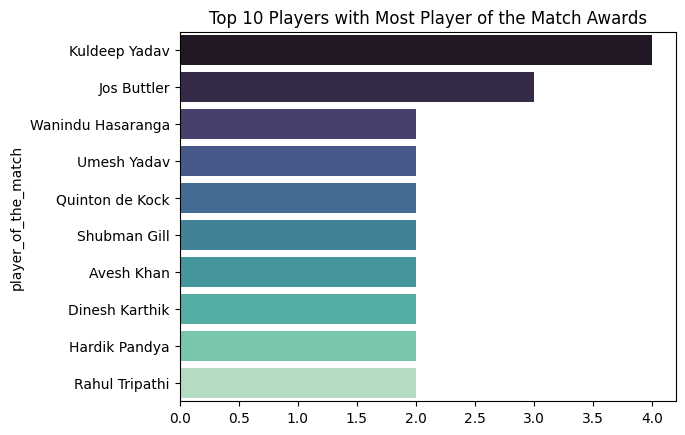

In [38]:
count = df['player_of_the_match'].value_counts().head(10)
sns.barplot(y=count.index, x=count.values, palette='mako')
plt.title('Top 10 Players with Most Player of the Match Awards')

Text(0, 0.5, 'Total Highscore')

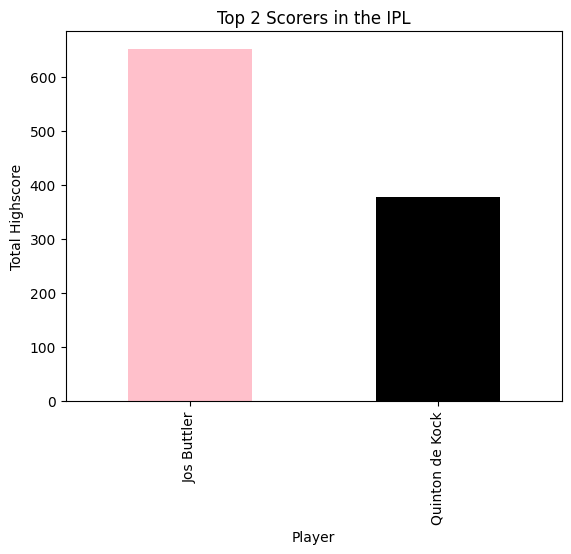

In [50]:
# top 2 scorers in the IPL
high = df.groupby('top_scorer')['highscore'].sum().sort_values(ascending=False).head(2)
high.plot(kind='bar', color=['pink', 'black'])
plt.title('Top 2 Scorers in the IPL')
plt.xlabel('Player')
plt.ylabel('Total Highscore')